In [1]:
import numpy as np
import numpy.random as rnd
import matplotlib.pyplot as plt

import tensorflow as tf

import gpflow
from gpflow.utilities import read_values, multiple_assign, set_trainable
from gpflow.inducing_variables import InducingPoints
import gpmaniflow
from gpmaniflow.models.SVGP import SVGP

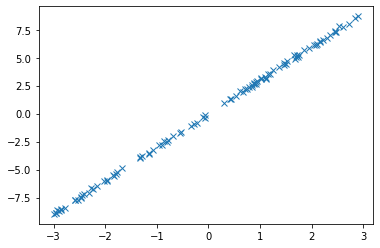

In [2]:
pX = np.linspace(-5.0, 5.0, 300)[:, None]
X = np.random.uniform(-3, 3, 100)[:, None]
Y = 3 * X + np.random.randn(*X.shape) * 0.1
Z = np.linspace(-5, 5, 50)[:, None]

train_dataset = tf.data.Dataset.from_tensor_slices((X, Y))
train_dataset = train_dataset.shuffle(1024).batch(len(X))

plt.plot(X,Y ,"x")

In [3]:
kernel = gpflow.kernels.SquaredExponential()

model = SVGP(kernel, likelihood = gpflow.likelihoods.Gaussian(), inducing_variable=InducingPoints(Z.copy()))

train_iter = iter(train_dataset.repeat())
training_loss = model.training_loss_closure(train_iter, compile=True)
optimizer = tf.keras.optimizers.Adam(0.01)
@tf.function
def optimization_step():
    optimizer.minimize(training_loss, model.trainable_variables)
elbo_hist = []
for step in range(2000):
    optimization_step()
    if step % 50 == 0:
        minibatch_elbo = -training_loss().numpy()
        print('Step: %s, Mini batch elbo: %s' % (step, minibatch_elbo))
        elbo_hist.append(minibatch_elbo)

ELBO = model.elbo((X,Y))

Step: 0, Mini batch elbo: -1553.9827232138462
Step: 50, Mini batch elbo: -634.1714579008013
Step: 100, Mini batch elbo: -242.58288200231954
Step: 150, Mini batch elbo: -172.74152497677497
Step: 200, Mini batch elbo: -154.80256885131905
Step: 250, Mini batch elbo: -150.25271106960207
Step: 300, Mini batch elbo: -147.60102867831694
Step: 350, Mini batch elbo: -145.33226265874347
Step: 400, Mini batch elbo: -144.02379702053884
Step: 450, Mini batch elbo: -140.8061032859741
Step: 500, Mini batch elbo: -138.27952819827578
Step: 550, Mini batch elbo: -135.49852532377446
Step: 600, Mini batch elbo: -132.6453833681411
Step: 650, Mini batch elbo: -129.53321466050403
Step: 700, Mini batch elbo: -126.38100505660015
Step: 750, Mini batch elbo: -122.51612246394978
Step: 800, Mini batch elbo: -118.6291734536684
Step: 850, Mini batch elbo: -114.35645030115481
Step: 900, Mini batch elbo: -109.49909156370747
Step: 950, Mini batch elbo: -104.46865144423168
Step: 1000, Mini batch elbo: -99.15134678001132

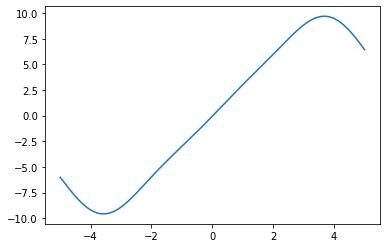

In [4]:
pmu, pvar = model.predict_f(pX)

plt.plot(pX, pmu)

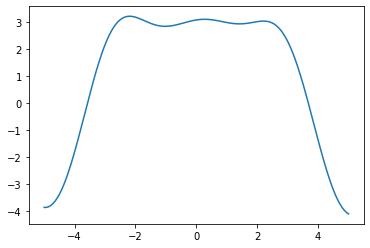

In [5]:
dmu, dvar = model.predict_df(pX)

plt.plot(pX, dmu[:,-1])

## Higher-dimensional input

In [6]:
pX = np.reshape(np.random.uniform(-2, 2, 200*2), [200, 2])
X = np.random.uniform(-3, 3, 200*2)[:, None]
X = np.reshape(X, [200, 2])
Y = 2 * X[:,0] + 1 * X[:,1] + np.random.randn(200) * 0.1
Y = np.reshape(Y, [200,1])
Z = np.random.uniform(-3, 3, 100*2)[:, None]
Z = np.reshape(Z, [100, 2])

train_dataset = tf.data.Dataset.from_tensor_slices((X, Y))
train_dataset = train_dataset.shuffle(1024).batch(len(X))

print(Y.shape)
#plt.plot(X,Y ,"x")

(200, 1)


We again define a model with a SqauredExponential kernel

In [7]:
kernel = gpflow.kernels.SquaredExponential()

model = SVGP(kernel, likelihood = gpflow.likelihoods.Gaussian(), inducing_variable=InducingPoints(Z.copy()))

train_iter = iter(train_dataset.repeat())
training_loss = model.training_loss_closure(train_iter, compile=True)
optimizer = tf.keras.optimizers.Adam(0.01)
@tf.function
def optimization_step():
    optimizer.minimize(training_loss, model.trainable_variables)
elbo_hist = []
for step in range(3000):
    optimization_step()
    if step % 50 == 0:
        minibatch_elbo = -training_loss().numpy()
        print('Step: %s, Mini batch elbo: %s' % (step, minibatch_elbo))
        elbo_hist.append(minibatch_elbo)

ELBO = model.elbo((X,Y))

Step: 0, Mini batch elbo: -1739.2594155842455
Step: 50, Mini batch elbo: -875.8584362834127
Step: 100, Mini batch elbo: -503.2556876576633
Step: 150, Mini batch elbo: -395.34807324932194
Step: 200, Mini batch elbo: -350.6758554858884
Step: 250, Mini batch elbo: -323.94904070046533
Step: 300, Mini batch elbo: -303.61380349385774
Step: 350, Mini batch elbo: -287.08622565844064
Step: 400, Mini batch elbo: -273.04790909335264
Step: 450, Mini batch elbo: -260.6265077713842
Step: 500, Mini batch elbo: -248.29282048212946
Step: 550, Mini batch elbo: -236.15508773621897
Step: 600, Mini batch elbo: -223.86059064698912
Step: 650, Mini batch elbo: -210.82760103061918
Step: 700, Mini batch elbo: -196.6524584191568
Step: 750, Mini batch elbo: -180.9849668387937
Step: 800, Mini batch elbo: -163.60192586347853
Step: 850, Mini batch elbo: -144.40377662720607
Step: 900, Mini batch elbo: -123.32063961018109
Step: 950, Mini batch elbo: -100.55827472444889
Step: 1000, Mini batch elbo: -76.44569083403101
S

<tf.Tensor: shape=(1, 2), dtype=float64, numpy=array([[2.63730736, 0.85839829]])>

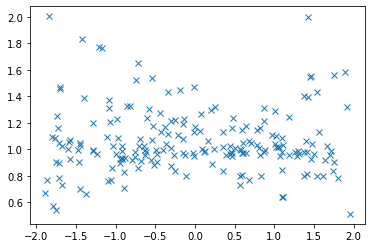

In [8]:
dmu, dvar = model.predict_df(pX)
plt.plot(pX[:,1], dmu[:,:,1], "x")
dmu[2,:,:]

In [9]:
kernel.lengthscales

<Parameter: dtype=float64, shape=[], fn="softplus", numpy=4.108936855246715>